<a href="https://colab.research.google.com/github/shivpandey2406/Machine-Learning-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trains a Neural Network model to classify images of clothing like Sneaker , Coat ,  Dress , Bag on corresponding to the Lables with in the ranges of 0 to 9.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Useful libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.17.0


## Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images  of clothing at low resolution (28 by 28 pixels). The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing. Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Loading the dataset returns four NumPy arrays: The train_images and train_labels arrays are the training set—the data the model uses to learn.The model is tested against the test set, the test_images, and test_labels arrays.The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9

# Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the Data

# Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels.

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
# There are 60000 labels in the training set
len(train_labels)

60000

In [6]:
# Each label is an integer between 0 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Similarly for test_image

In [9]:
test_images.shape
len(test_labels)
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## Preprocess the Data : The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255

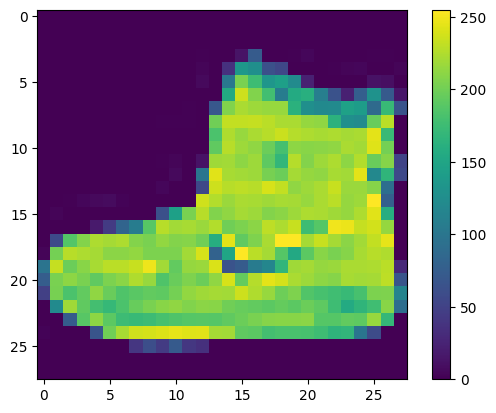

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0
train_images
test_images

## To verify that the data is in the correct format and that we're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image

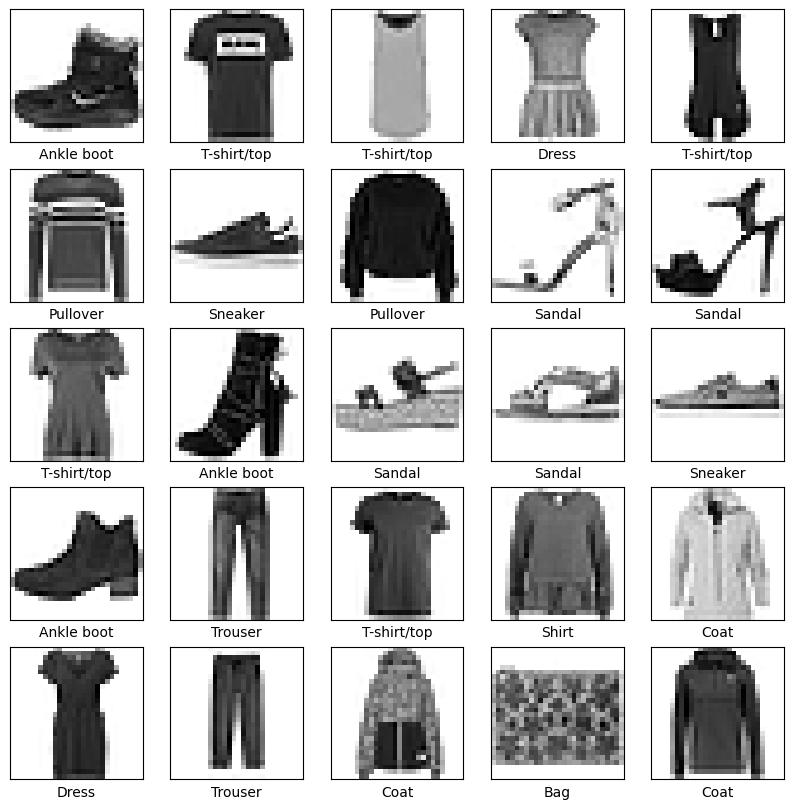

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model - Building the neural network requires configuring the layers of the model, then compiling the model.

## Set up the layers : The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data. After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

## Compile the model : Before the model is ready for training, it needs a few more settings. These are added during the model's compile step -  Optimizer —This is how the model is updated based on the data it sees and its loss function.  Loss function — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.  Metrics — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

## Train the model - Training the neural network model requires the following steps:

## 1 -Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
## 2 - the model learns to associate images and labels.
## 3 - we ask the model to make predictions about a test set—in this example, the test_images array.
# 4 - Verify that the predictions match the labels from the test_labels array.

## Feed the model - To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset (example with MNIST)
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_split=0.1)




Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8686 - loss: 0.4593 - val_accuracy: 0.9632 - val_loss: 0.1244
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9619 - loss: 0.1291 - val_accuracy: 0.9705 - val_loss: 0.1033
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9741 - loss: 0.0859 - val_accuracy: 0.9795 - val_loss: 0.0766
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9813 - loss: 0.0625 - val_accuracy: 0.9760 - val_loss: 0.0853
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9856 - loss: 0.0474 - val_accuracy: 0.9803 - val_loss: 0.0699
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9895 - loss: 0.0355 - val_accuracy: 0.9790 - val_loss: 0.0775
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9908 - loss: 0.0278 - val_accuracy: 0.9762 - val_loss: 0.0929
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9944 - loss: 0.0220

As the mpdel trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.99 or 99% on the training data.

# Evaluate accuracy or model

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9799 - loss: 0.0754

Test accuracy: 0.9799000024795532


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data

## Make Prediction : With the model trained, we can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [23]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
probability_model

<Sequential name=sequential_4, built=False>

In [25]:
predictions = probability_model.predict(test_images)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[9.5879649e-10, 7.4318302e-11, 5.1676818e-07, ..., 9.9996787e-01,
        4.1127057e-09, 1.5896229e-07],
       [6.0103461e-10, 9.3889369e-08, 9.9999982e-01, ..., 3.1053252e-13,
        2.7238650e-08, 1.6607824e-13],
       [2.1535859e-08, 9.9990743e-01, 2.3874770e-06, ..., 8.0053636e-05,
        9.4070247e-06, 4.4594430e-09],
       ...,
       [1.2947902e-18, 4.8449661e-14, 2.0616413e-16, ..., 6.0243309e-08,
        1.1506330e-11, 3.9289848e-08],
       [6.2099115e-12, 1.7392697e-14, 2.7912702e-15, ..., 2.0796363e-11,
        1.6725128e-09, 1.8379408e-16],
       [7.6219131e-10, 2.9757381e-15, 1.8355560e-11, ..., 1.2783693e-17,
        2.7622410e-12, 1.4076321e-12]], dtype=float32)

## Take a look at the first prediction

In [26]:
predictions[0]

array([9.5879649e-10, 7.4318302e-11, 5.1676818e-07, 3.1462831e-05,
       7.8511170e-15, 1.2188688e-09, 4.2256085e-17, 9.9996787e-01,
       4.1127057e-09, 1.5896229e-07], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value in above result.

In [27]:
np.argmax(predictions[0])

7

So, the model is most confident that this image is an Sneaker, or class_names[7]. Examining the test label shows that this classification is correct

In [30]:
test_labels[0]


7

### Define functions to graph the full set of 10 class predicitons.

In [39]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Both the code have same results

In [42]:
# Define plotting functions
def plot_image(i, predictions_array, true_labels, images):
    true_label = true_labels[i]
    predicted_label = np.argmax(predictions_array)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')

def plot_value_array(i, predictions_array, true_labels):
    true_label = true_labels[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    thisplot[true_label].set_color('red')
    thisplot[np.argmax(predictions_array)].set_color('blue')

## Verify Predictions :
With the model trained, We can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label

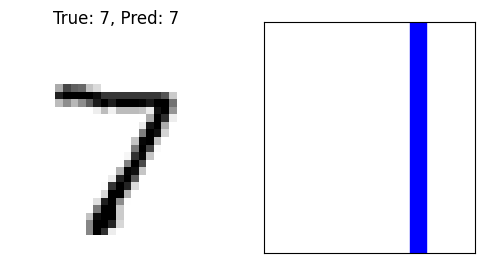

In [44]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

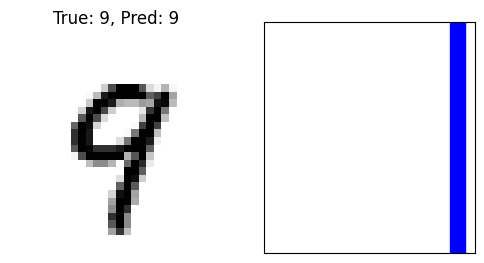

In [43]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's Plot several images with their predictions.

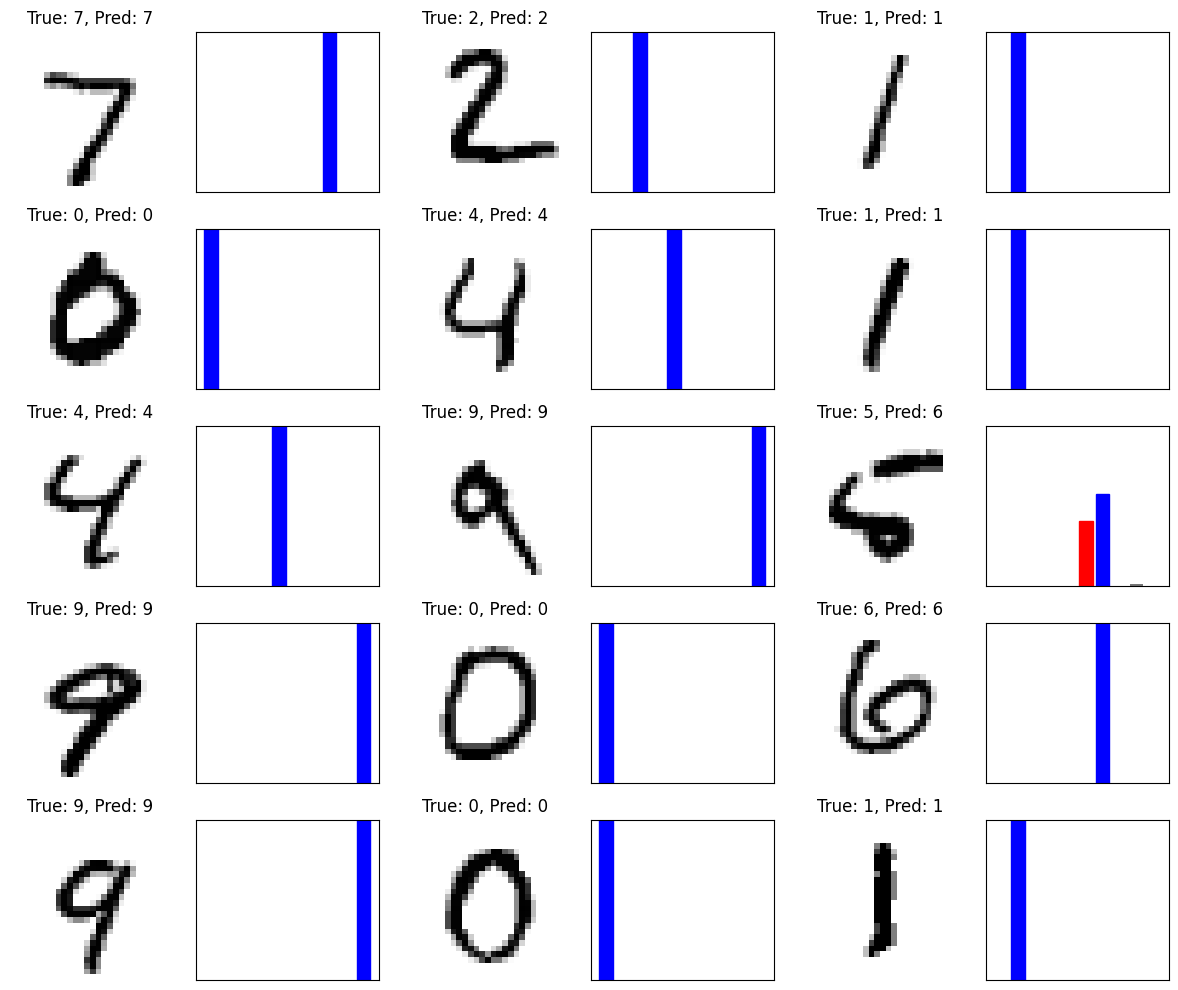

In [45]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the trained model : Train the model to make a predictio about a single image.

In [46]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list

In [47]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


# Now predict the correct lable dor the image.


In [48]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[6.0103467e-10 9.3889547e-08 9.9999988e-01 3.7661213e-08 3.1536972e-21
  2.6472702e-09 2.9661901e-11 3.1053195e-13 2.7238652e-08 1.6607730e-13]]


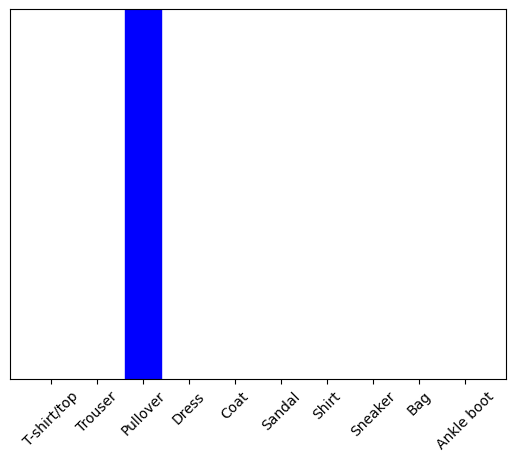

In [49]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [50]:
np.argmax(predictions_single[0])

2